In [1]:
import dask
from dask.distributed import Client

In [2]:
client = Client()

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 20,Total memory: 31.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40287,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 31.19 GiB
Comm: tcp://127.0.0.1:39877,Total threads: 4
Dashboard: http://127.0.0.1:35479/status,Memory: 6.24 GiB
Nanny: tcp://127.0.0.1:40977,


In [7]:
def inc(x):
    return x + 1

def double(x):
    return x * 2

def add(x, y):
    return x + y

data = range(1000)

output = []
for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

In [8]:
total.compute()

1499500

Note that you can also visualize task graphs in your notebook. You will just need to [install the `graphviz` python package (via `pip install graphviz`) ***and*** the `graphviz` system library to do so](https://docs.dask.org/en/stable/graphviz.html). Note, that we scaled the data size down from `range(1000)` above to `range(4)` for visualization:

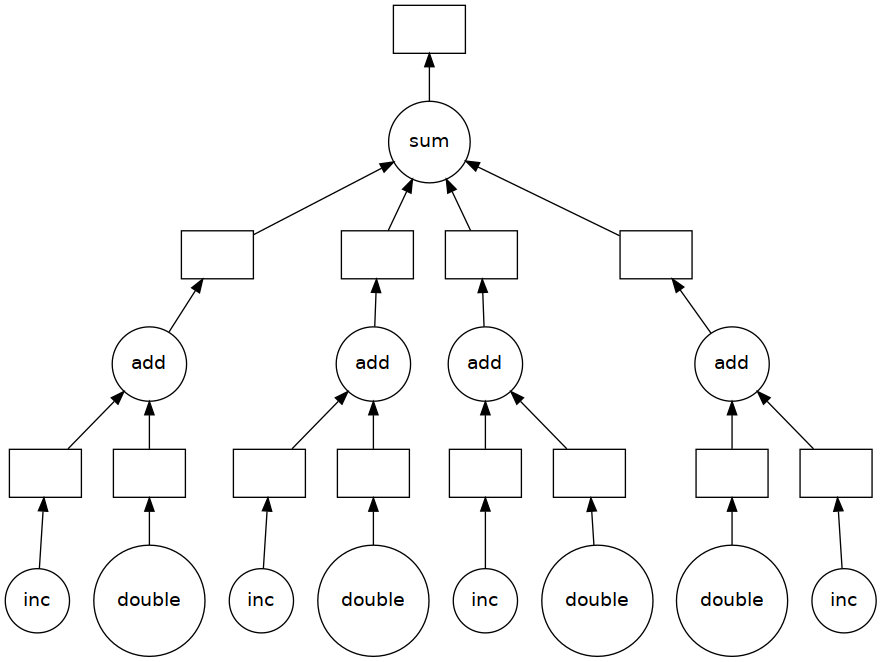

In [6]:
total.visualize()